In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import os
import matplotlib.pyplot as plt
from configs.RecursiveVPSDE.Markovian_fBiPotDDims.recursive_Markovian_PostMeanScore_fBiPot8Dims_T256_H05_tl_110data_StbleTgt_FULLDATA_HIGHNOISE import get_config

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
config = get_config()
num_paths = 1024 if config.feat_thresh == 1. else 10240
assert num_paths == 10240
root_dir = "/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/"

In [4]:
import pandas as pd
def get_drift_files_nonfull(config, root_dir ):
    ts_type = f"{config.ndims}DDims"
    include = (f"_{num_paths}NPaths_{config.t0}t0_{config.deltaT:.3e}dT_").replace(".", "")
    root_nadaraya_dir = root_dir + f"ExperimentResults/Nadaraya/8DDimsHighNoise/"
    true_files = []
    local_files = []
    mses = []
    for file in os.listdir(root_nadaraya_dir):
        if "IIDNadaraya" in file and ts_type in file and include in file:
            if "true" in file:
                true_files.append(root_nadaraya_dir+file)
            elif "global" in file:
                local_files.append(root_nadaraya_dir+file)
            elif "bwidx" in file and "MSEs" not in file:
                mses_full = pd.read_parquet(root_nadaraya_dir+file)
                mses.append(mses_full)
    mses = pd.concat(mses).sort_values("bw", axis=0).dropna()
    print(mses)
    assert len(true_files)>0, "No true files found"
    assert len(local_files)>0, "No local files found"
    assert (len(true_files) == len(local_files))
    def extract_bw_number(s):
        match = s.split("/")[-1].split("_")[4][:-2]
        return float("0." + match)
    true_files = sorted(true_files, key=extract_bw_number)
    local_files = sorted(local_files, key=extract_bw_number)
    bws = [extract_bw_number(f) for f in true_files]
    return true_files, local_files, bws, mses

              bw            mse
0       0.000282  205083.437500
1       0.000372  205083.437500
2       0.000491  205083.437500
3       0.000649  205083.437500
4       0.000857  205083.437500
5       0.001131  205083.437500
6       0.001493  205083.328125
7       0.001972  205081.796875
8       0.002603  205076.921875
9       0.003437  205064.781250
10      0.004538  205046.234375
11      0.005992  205012.625000
12      0.007912  204963.921875
13      0.010446  204890.562500
14      0.013793  204775.671875
15      0.018211  204584.656250
16      0.024046  204229.234375
17      0.031749  203575.578125
18      0.041919  202457.328125
19      0.055348  200583.171875
20      0.073079  197294.921875
21      0.096490  191341.828125
22      0.127401  180883.250000
23      0.168214  163302.546875
24      0.222102  134814.093750
25      0.293252   92817.789062
26      0.387196   45641.832031
27      0.511235   14166.774414
28      0.675010    3085.598389
29      0.891251    1266.518066
30      

Text(0.5, 1.0, 'Minimum MSE is (1266.5181, 29)')

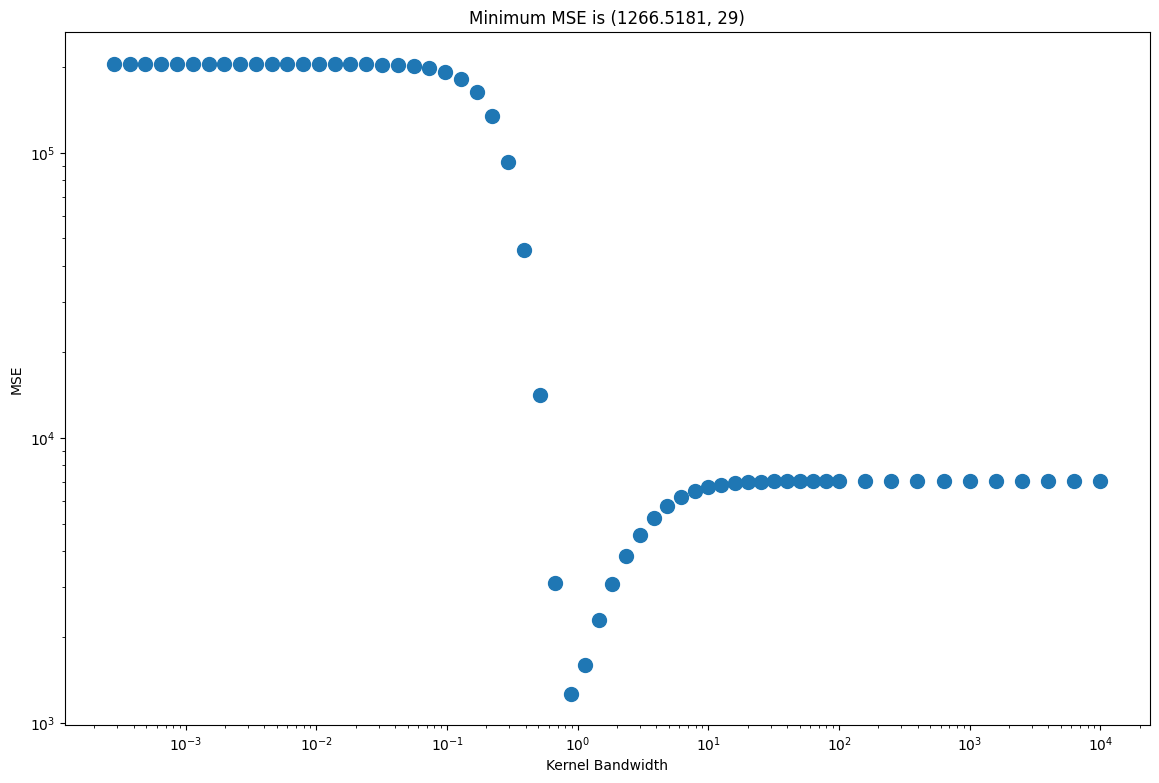

In [6]:
config = get_config()
true_files, local_files, bws, mses = get_drift_files_nonfull(config=config, root_dir=root_dir)
fig, ax = plt.subplots(figsize=(14,9))
mses.plot(kind="scatter", x="bw", y="mse", ax=ax, s=100)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel("MSE")
ax.set_xlabel("Kernel Bandwidth")
ax.set_title(f"Minimum MSE is {mses.iloc[np.argmin(mses.mse), 1], np.argmin(mses.mse)}")